# Desenvolvimento Filtro Passa Baixa

Analisando o sinal, podemos ver que o ruído se encontra em torno de 8 kHz, mas para remover completamente ele e outros ruídos de fundo podemos simplesmente pegar a faixa de frequência da voz humana e multiplicar seu limite superior por uma constante para deixar passar algumas harmônicas.

Foi decidido então que a frequência de corte do filtro deve se encontrar em torno de 2 kHz, dado que a voz humana vai até ~250 Hz e que será usado o pyfda para o design do filtro.

A janela selecionado foi a janela Kaiser, com $\beta=3.0$ e N=10, devido a sua boa resposta em frequência.

In [1]:
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavf
import scipy.signal as sp

import pandas as pd
import numpy as np

import DSP

df = pd.read_csv("ab_PB.csv")
b  = np.array(df['b'])
a  = np.array(df['a'])

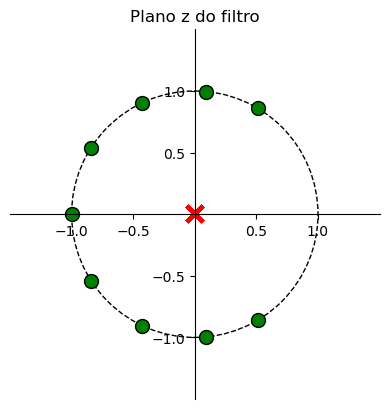

(array([ 0.51093166+0.85962134j,  0.51093166-0.85962134j,
         0.09151633+0.99580358j,  0.09151633-0.99580358j,
        -1.        +0.j        , -0.84163986+0.54003921j,
        -0.84163986-0.54003921j, -0.4259869 +0.90472933j,
        -0.4259869 -0.90472933j]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [2]:
DSP.zplane(b, a, title="Plano z do filtro")

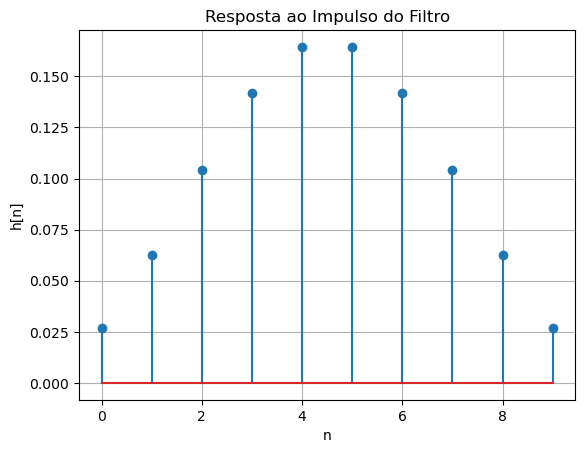

In [6]:
x = np.zeros(1000)
x[0] = 1
h = sp.lfilter(b, a, x)
plt.stem(h[:10])
plt.title("Resposta ao Impulso do Filtro")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.grid(True, 'both')
plt.show()

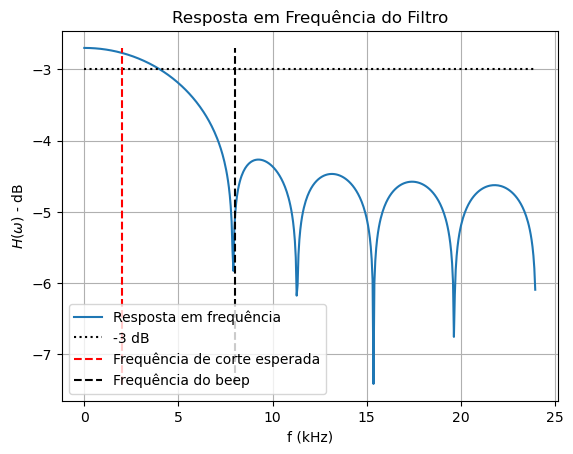

In [31]:
#DSP.plot_FFT(h, T=1/48e3, dB=True, title="Resposta em Frequência do Filtro")

[H, w] = DSP.get_FFT(h, 1/48)
H = np.log10(np.abs(H)) # Converte para dB
plt.plot(w, H)
plt.title("Resposta em Frequência do Filtro")
plt.ylabel("$H(\omega)$ - dB")
plt.xlabel("f (kHz)")
plt.grid(True, 'both')
plt.plot([w[0], w[-1]], [-3, -3], 'k:')
plt.plot([2, 2], [np.min(H), np.max(H)], 'r--')
plt.plot([8, 8], [np.min(H), np.max(H)], 'k--')
plt.legend(['Resposta em frequência', '-3 dB', 'Frequência de corte esperada', 'Frequência do beep'],
           loc = 'lower left')
plt.show()

In [5]:
[fs, raw_signal]    = wavf.read("Sinais/fala-tom-alta-freq.wav")
converted_signal    = raw_signal/(float(1<<16) - 1)     # Converte de int16 para float
filtered_signal     = sp.lfilter(b, a, converted_signal)
filtered_signal     = DSP.normalize(filtered_signal)

wavf.write("Sinais/fala_sem_tom_alta_freq.wav", fs, filtered_signal)

C:\Users\emanuel\AppData\Local\Temp\ipykernel_14256\3956514524.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  [fs, raw_signal]    = wavf.read("Sinais/fala-tom-alta-freq.wav")


Podemos ver no resultado que um "fantasma" do beep ainda existe no áudio filtrado, mas o barulho do beep não é mais discernível e a voz agora está bem clara.